<a href="https://colab.research.google.com/github/estevaosmith/Portifolio/blob/main/%5BPROJETO%5D_Clustering_com_Dados_do_FIFA_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center"><img src="https://img.freepik.com/fotos-gratis/pessoas-no-estadio-de-futebol_23-2151548540.jpg?t=st=1719787320~exp=1719790920~hmac=042992a1a5c879b17886bccd1ff14f1d3901c7f2f1e3c8a604a3d57c571d368e&w=1060" height="250px"></p>

# Usando Clusters para Scouting no Futebol

Quando jogamos um game de futebol como FIFA ou PES e encaramos o modo carreira como *manager*, enfrentamos diversos desafios, entre eles, contratar jogadores potenciais que atendam às nossas demandas e estilo de jogo. Um grande problema é que, em suma, montamos times de acordo com o nosso conhecimento empírico do futebol ou com o que ouvimos falar sobre determinado jogador. Este tipo de atitude não é recomendado, haja vista que podemos contratar jogadores renomados, mas que não se encaixem bem no time.

Geralmente, somos desafiados em times com baixo orçamento e peças limitadas, e então, é preciso reforçar nossa equipe. A grande pergunta nesses casos é: é possível montar um time com jogadores promissores e com baixo orçamento? A resposta é sim, é possível, e técnicas de Machine Learning e análise de dados podem nos ajudar nesse processo, assim como auxiliam também em situações em que temos um bom orçamento e estamos competindo "nas cabeças" em todos os campeonatos possíveis.

<p align="center"><img src="https://img.freepik.com/fotos-gratis/futebol-no-conceito-de-sucesso-do-objetivo_1150-5273.jpg?t=st=1719787707~exp=1719791307~hmac=34f16fe7db5ace25fed05f6550c821a5603678d4552b6bd6329e29b1e2d0dd00&w=996" height="500px"></p>
<p align="center">

O objetivo deste projeto é utilizar clustering para agrupar jogadores com características semelhantes e perguntar aos dados como esses jogadores se comportam, para encontrar jogadores bons,promissores e baratos no FIFA.

*Clustering* é uma técnica de *machine learning* para realizar agrupamentos. Com ela, conseguimos, por exemplo, encontrar jogadores com características semelhantes de jogo, analisar seus pontos positivos e negativos .

Vou utilizar dados do Kaggle, que contêm os dados dos jogadores do EA 24, o jogo mais completo de futebol do mercado. Link para o dataset: https://www.kaggle.com/datasets/stefanoleone992/ea-sports-fc-24-complete-player-dataset

É importante lembrar também que os atributos do jogo não representam 100% a realidade, porém, existe uma grande equipe por trás deste jogo que analisa os jogadores e tenta entregar a maior similaridade possível com o mundo real.

In [48]:
# importando os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


# allowing all the columns to be visualized
pd.options.display.max_columns = None

# rendering all graphics straight out of the notebook
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [49]:
# importando os dados
df = pd.read_csv('/content/male_players.csv')

# verificando as dimensões
print('Dimensões do Dataset',
    '\nVariáveis: ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])

# verificando as primeiras entradas
df.head()

<ipython-input-49-9b80dc0e4c93>:2: DtypeWarning:

Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.



Dimensões do Dataset 
Variáveis:  109 
Entradas:  180021


,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,181500000.0,230000.0,24,1998-12-20,182,75,73.0,Paris Saint Germain,16.0,Ligue 1,1.0,LW,7.0,NaN,2018-07-01,2024.0,18,France,1335.0,LW,10.0,Right,4,5,5,High/Low,Unique,Yes,349400000.0,"#Speedster, #Dribbler, #Acrobat, #Clinical fin...","Quick Step +, Rapid, Flair, Trivela",97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,NaN,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,2000-07-21,195,94,10.0,Manchester City,13.0,Premier League,1.0,ST,9.0,NaN,2022-07-01,2027.0,36,Norway,1352.0,ST,9.0,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,"#Aerial threat, #Distance shooter, #Strength, ...","Acrobatic +, Power Header, Quick Step",89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,NaN,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,1991-06-28,181,75,10.0,Manchester City,13.0,Premier League,1.0,SUB,17.0,NaN,2015-08-30,2025.0,7,Belgium,1325.0,CAM,7.0,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,"#Dribbler, #Playmaker, #Distance shooter, #Cro...","Pinged Pass +, Dead Ball, Incisive Pass, Long ...",72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,NaN,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,1987-06-24,169,67,112893.0,Inter Miami,39.0,Major League Soccer,1.0,RF,10.0,NaN,2023-07-16,2025.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,"#Dribbler, #Playmaker, #FK Specialist, #Acroba...","Technical +, Finesse Shot, Dead Ball, Pinged P...",80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,NaN,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,

Iremos excluir algumas colunas desnecessárias para a nossa análise e posteriormente, permitir uma melhor visualização dos jogadores agrupados.

Vou excluir tambem todas as entradas dos FIFAS antigos, deixando o dataset somente com as informacoes atualizadas.


In [50]:
#Excluindo algumas colunas desnecessárias para a análise
df = df[df['fifa_version'] == 24.0]
df_novo = df.drop(columns=['player_id','player_url', 'dob', 'real_face', 'release_clause_eur',
                 'club_contract_valid_until_year','fifa_update','club_team_id','league_id','league_name','league_level','club_jersey_number','club_loaned_from', 'ls', 'st', 'rs', 'lw',
                 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb',
                 'lb', 'lcb', 'cb', 'rcb', 'rb','update_as_of','fifa_version','nationality_id'])

O *K-Means* não aceita atributos nominais, somente atributos numéricos, então é necessário selecionar as features necessárias.

Agruparemos os jogadores conforme as seguintes métricas/características:


* Overall: é a nota geral do jogador, o que varia de 0 a 100
* Potential: Nível potencial do jogador, que também varia de 0 a 100
* Weak Foot: Habilidade com pé fraco, que varia de 1 a 5. Quando mais alto, melhor a habilidade com pé fraco.
* Skill Moves: É a habilidade de se mover, que simplesmente metrifica a qualidade o jogador para realizar certos movimentos especiais com a bola, seja para driblar ou não.
* Pace: Metrificação do ritmo do jogador, que varia de 0 a 100.
* Shooting: Métrica de qualidade dos chutes do jogador, que varia de 0 a 100.
* Passing: Métrica de qualidade dos passes do jogador, que varia de 0 a 100.
* Dribbling: Metrifica a capacidade do jogador de carregar a bola e passar por um adversário. Um valor mais alto significa que o jogador será capaz de manter melhor a posse da bola enquanto dribla, pois manterá a bola mais perto, tornando mais difícil para o adversário tomá-la.
* Defending: Métrica de qualidade para se defender de um determinado jogador, que varia de 0 a 100.
* Physic: Métrica de qualidade do físico do jogador, que varia de 0 a 100.

As demais métricas utilizadas são relativas a goleiros da base de dados, como habilidade de fazer uma defesa enquanto mergulha pelo ar (diving), frequência com que o goleiro pega a bola ao invés de defendê-la e se ele a segura ou não (handling),  o comprimento e a precisão dos seus arremessos longos/ chutes(kicking), a rapidez com que ele reage a um chute a gol (speed), seu posicionamento correto ao salvar seu time fazendo uma defesa, que também afeta a forma como o goleiro reage aos cruzamentos (positioning).  




In [51]:
# Selecionando as features numéricas
df_num = pd.DataFrame(df[['overall','potential','weak_foot','skill_moves','pace','shooting',
                         'passing','dribbling','defending','physic', 'goalkeeping_diving','goalkeeping_handling',
                         'goalkeeping_kicking','goalkeeping_reflexes','goalkeeping_speed','goalkeeping_positioning']].values)

# Salvando os nomes das colunas
cols = df[['overall','potential','weak_foot','skill_moves','pace','shooting',
           'passing','dribbling','defending','physic','goalkeeping_diving','goalkeeping_handling',
           'goalkeeping_kicking','goalkeeping_reflexes','goalkeeping_speed','goalkeeping_positioning']].columns

In [52]:
df_num.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,91.0,94.0,4.0,5.0,97.0,90.0,80.0,92.0,36.0,78.0,13.0,5.0,7.0,6.0,NaN,11.0
1,91.0,94.0,3.0,3.0,89.0,93.0,66.0,80.0,45.0,88.0,7.0,14.0,13.0,7.0,NaN,11.0
2,91.0,91.0,5.0,4.0,72.0,88.0,94.0,87.0,65.0,78.0,15.0,13.0,5.0,13.0,NaN,10.0
3,90.0,90.0,4.0,4.0,80.0,87.0,90.0,94.0,33.0,64.0,6.0,11.0,15.0,8.0,NaN,14.0
4,90.0,90.0,4.0,4.0,79.0,88.0,83.0,87.0,39.0,78.0,13.0,11.0,5.0,7.0,NaN,5.0


In [53]:
# Substituindo os valores nulos por 0

df_num = df_num.fillna(0)

Observe que há 2 atributos fora da escala. É preciso colocar todos os atributos na mesma escala, entre 0 e 1.

In [54]:
# Colocando os dados na mesma escala
scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(df_num))
scaled.columns = cols

scaled.head()

,overall,potential,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_reflexes,goalkeeping_speed,goalkeeping_positioning
0,1.000000,1.000000,0.75,1.00,1.000000,0.967742,0.851064,0.978723,0.404494,0.876404,0.125000,0.034091,0.056180,0.043956,0.0,0.102273
1,1.000000,1.000000,0.50,0.50,0.917526,1.000000,0.702128,0.851064,0.505618,0.988764,0.056818,0.136364,0.123596,0.054945,0.0,0.102273
2,1.000000,0.934783,1.00,0.75,0.742268,0.946237,1.000000,0.925532,0.730337,0.876404,0.147727,0.125000,0.033708,0.120879,0.0,0.090909
3,0.977273,0.913043,0.75,0.75,0.824742,0.935484,0.957447,1.000000,0.370787,0.719101,0.045455,0.102273,0.146067,0.065934,0.0,0.136364
4,0.977273,0.913043,0.75,0.75,0.814433,0.946237,0.882979,0.925532,0.438202,0.876404,0.125000,0.102273,0.033708,0.054945,0.0,0.034091


 Agora, vou plotar o Elbow Method para verificar a quantidade de clusters que iremos precisar.

#### *Elbow Method*

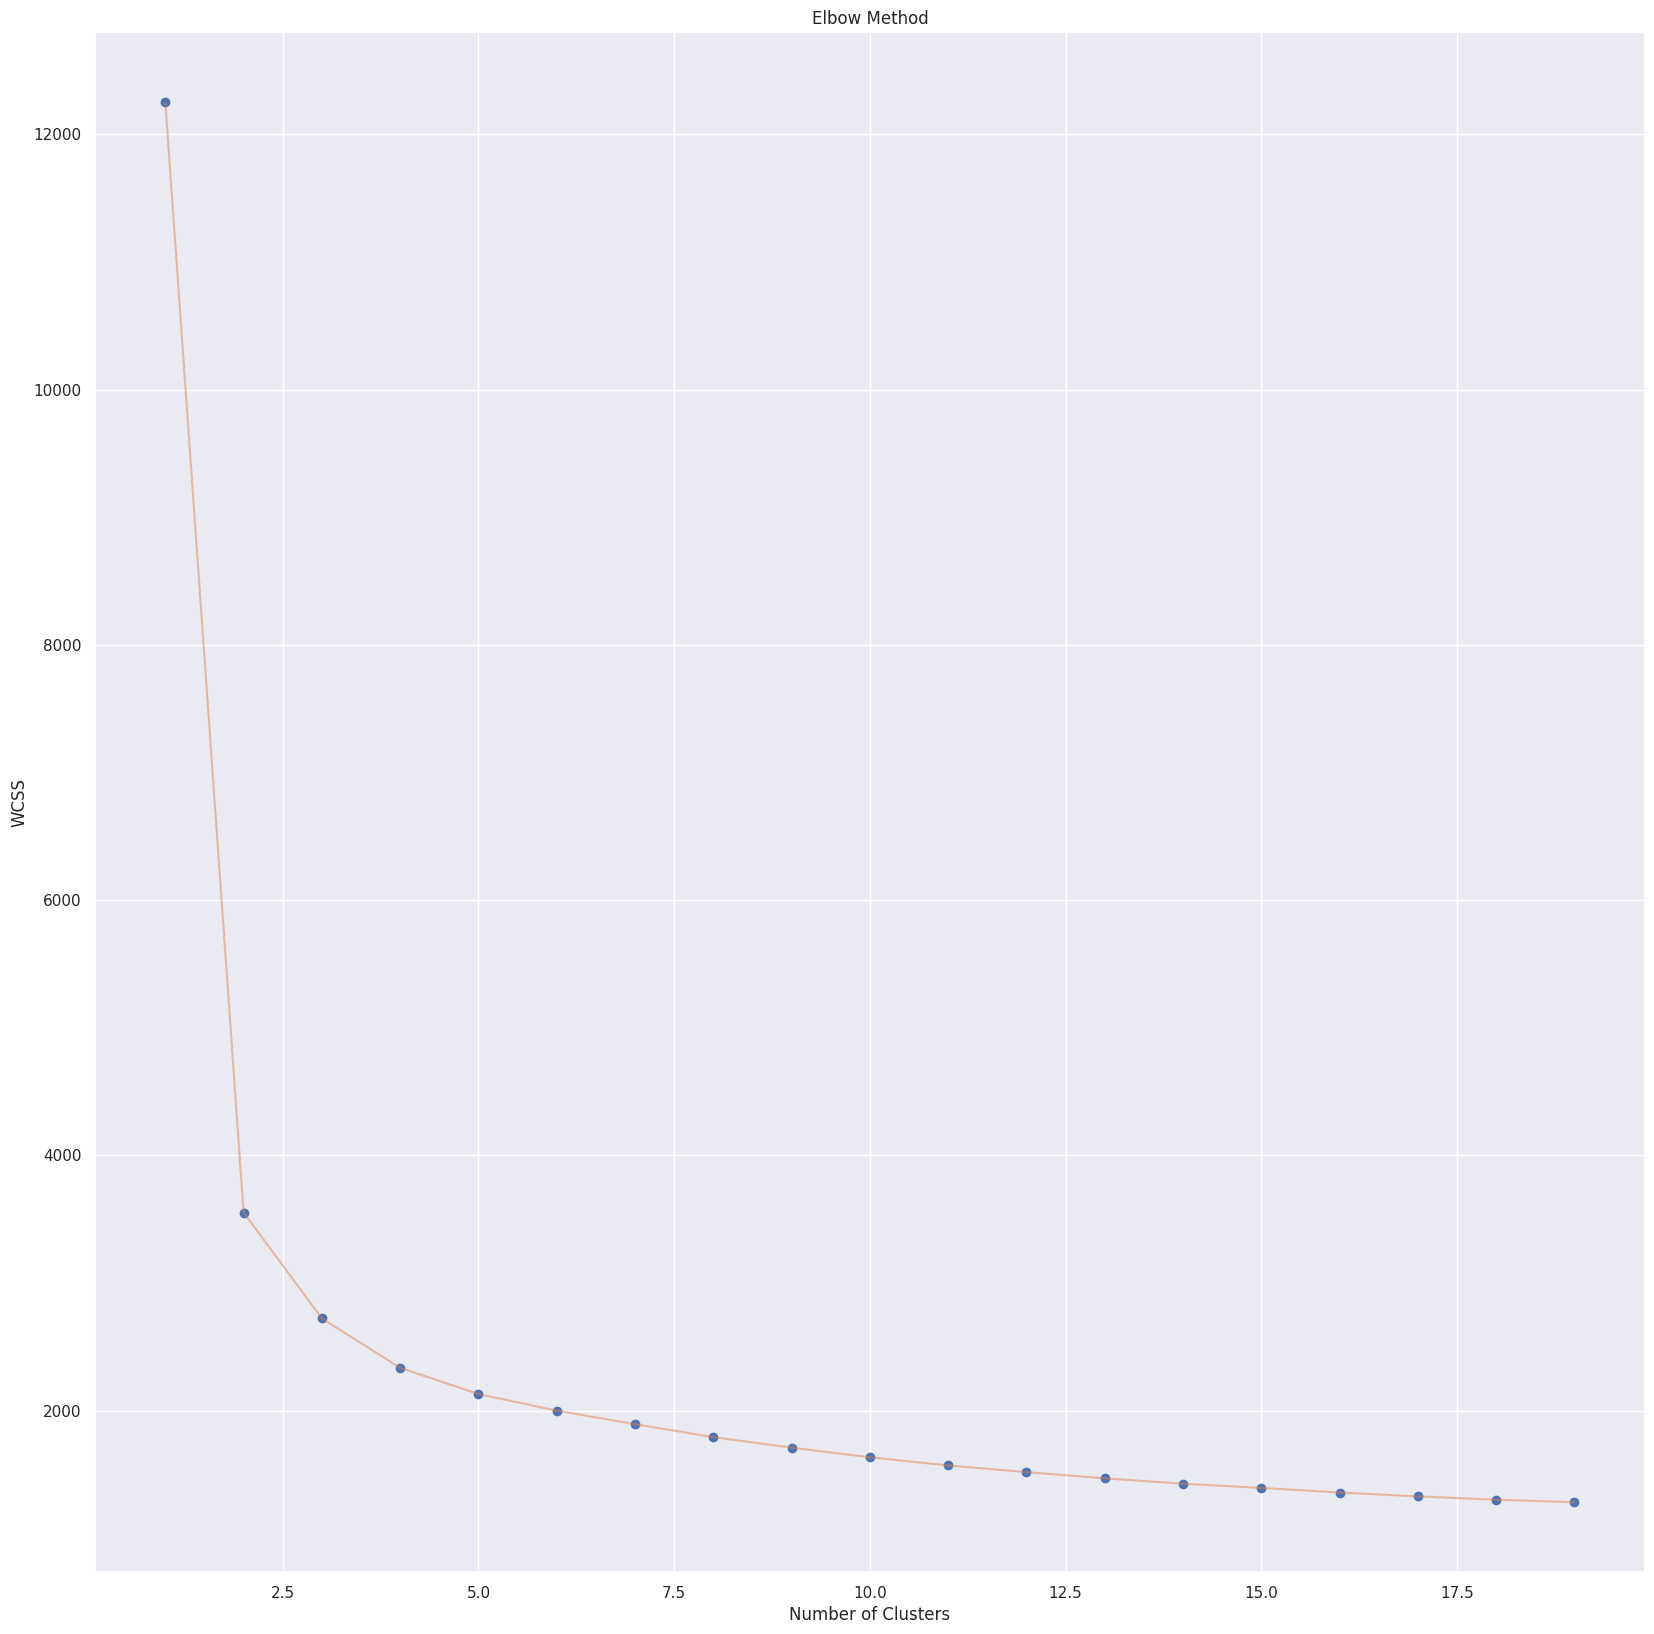

In [55]:
wcss = []
for i in range(1,20):
  # instanciando o modelo
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  # dando fit nos dados
  kmeans.fit(scaled)
  # salvando os resultados na lista
  wcss.append(kmeans.inertia_)

# plotando o Elbow Method
plt.figure(figsize=(20,20))
plt.plot(range(1,20), wcss, 'o')
plt.plot(range(1 , 20) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

In [56]:
# verificar os resultados
print('Lista Com Erros: ', wcss)

Lista Com Erros:  [12250.888606967455, 3552.0136393323046, 2722.29006100237, 2335.121915179498, 2129.6468062548015, 1999.529617696638, 1893.741519758471, 1792.01019710867, 1709.6639261908308, 1634.1665030746515, 1570.1188897467944, 1517.654503822731, 1469.311276822315, 1427.1480026861661, 1394.1721076155713, 1358.2254304523622, 1327.8313390450985, 1302.0058613187443, 1281.8946844753827]


In [57]:
# diferença entre os elementos
dif = np.diff(wcss)
print('Diferença Entre os Elementos: ', dif)

Diferença Entre os Elementos:  [-8698.87496764  -829.72357833  -387.16814582  -205.47510892
  -130.11718856  -105.78809794  -101.73132265   -82.34627092
   -75.49742312   -64.04761333   -52.46438592   -48.343227
   -42.16327414   -32.97589507   -35.94667716   -30.39409141
   -25.82547773   -20.11117684]


12 pode ser um bom número de Clusters.

Agora, vamos instanciar o modelo a ser usado, definindo o número correto de clusters e verificando como os jogadores foram separados.

In [58]:
# instanciando o modelo
kmeans = KMeans(n_clusters = 12, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(scaled)

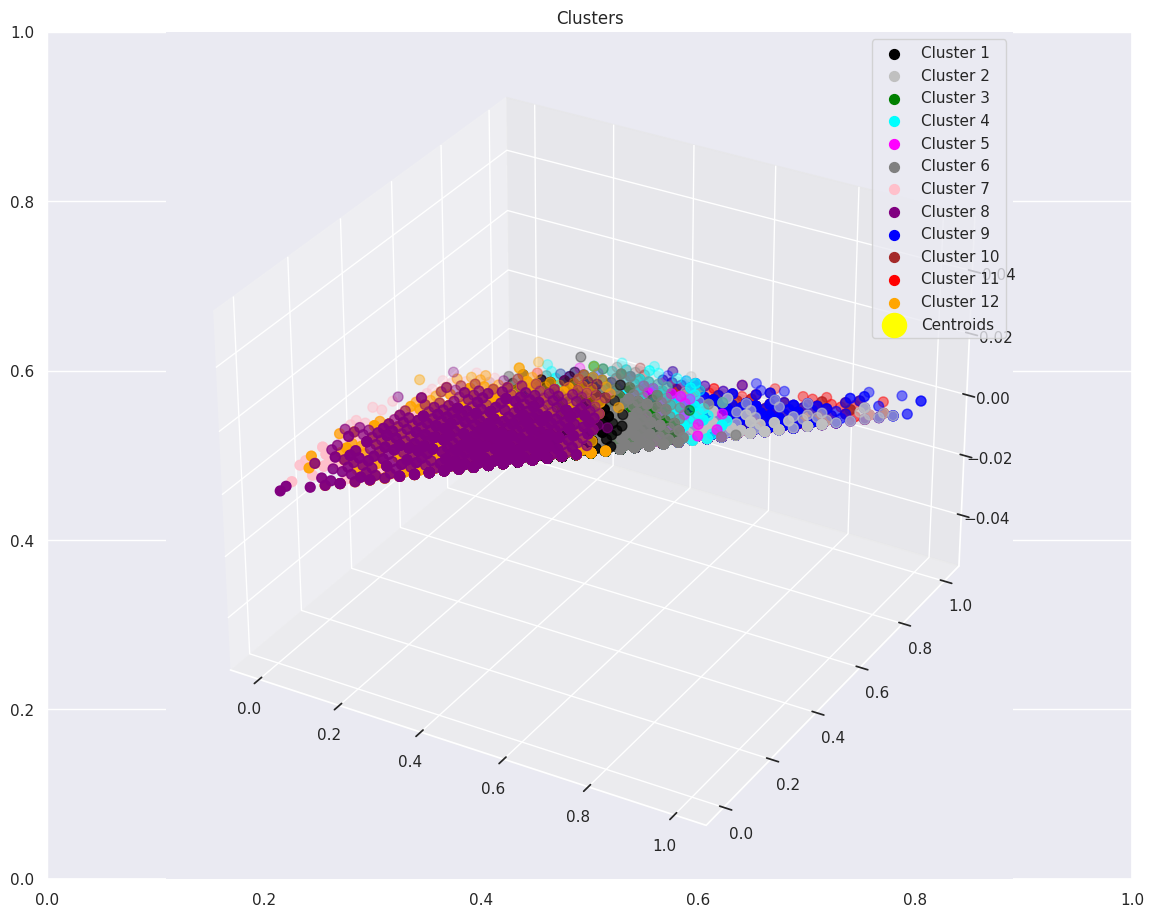

In [59]:
# visualizando os clusters
fig, ax = plt.subplots(figsize=(14,11))
scaled = scaler.fit_transform(df_num)
# definindo a figura em 3 dimensões
ax = fig.add_subplot(111, projection='3d')
# plotando os clusters
plt.scatter(scaled[y_kmeans == 0,0],scaled[y_kmeans == 0,1], s= 50, c= 'black',label= 'Cluster 1')
plt.scatter(scaled[y_kmeans == 1,0], scaled[y_kmeans == 1,1], s= 50, c= 'silver', label= 'Cluster 2')
plt.scatter(scaled[y_kmeans == 2,0], scaled[y_kmeans == 2,1], s= 50, c= 'green', label= 'Cluster 3')
plt.scatter(scaled[y_kmeans == 3,0], scaled[y_kmeans == 3,1], s= 50, c= 'cyan', label= 'Cluster 4')
plt.scatter(scaled[y_kmeans == 4,0], scaled[y_kmeans == 4,1], s= 50, c= 'magenta', label= 'Cluster 5')
plt.scatter(scaled[y_kmeans == 5,0], scaled[y_kmeans == 5,1], s= 50, c= 'gray', label= 'Cluster 6')
plt.scatter(scaled[y_kmeans == 6,0],scaled[y_kmeans == 6,1], s= 50, c= 'pink',label= 'Cluster 7')
plt.scatter(scaled[y_kmeans == 7,0], scaled[y_kmeans == 7,1], s= 50, c= 'purple', label= 'Cluster 8')
plt.scatter(scaled[y_kmeans == 8,0], scaled[y_kmeans == 8,1], s= 50, c= 'blue', label= 'Cluster 9')
plt.scatter(scaled[y_kmeans == 9,0], scaled[y_kmeans == 9,1], s= 50, c= 'brown', label= 'Cluster 10')
plt.scatter(scaled[y_kmeans == 10,0], scaled[y_kmeans == 10,1], s= 50, c= 'red', label= 'Cluster 11')
plt.scatter(scaled[y_kmeans == 11,0], scaled[y_kmeans == 11,1], s= 50, c= 'orange', label= 'Cluster 12')


# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, c= 'yellow', label= 'Centroids')
plt.title('Clusters')
plt.legend()
plt.savefig('clusters.png')
plt.show()

Finalmente, é necessário visualizar as previsões, converte-las para um dataframe e concatenar com os clusters para analisar os agrupamentos de jogadores gerados.

In [60]:
# visualizando as previsões
y_kmeans

array([ 8,  8,  8, ..., 11,  6,  6], dtype=int32)

In [61]:
# convertendo as previsões para um dataframe
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['cluster']

# previsões como um df
print(kmeans.shape)
kmeans.head()

(18350, 1)


,cluster
0,8
1,8
2,8
3,8
4,8


In [62]:
# concatenando os clusters
df = pd.concat([df_novo, kmeans], axis=1)

# conferindo os dataframes
print(df.shape)
df.head()

(18350, 68)


,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,club_position,club_joined_date,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,gk,cluster
0,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,181500000.0,230000.0,24,182,75,Paris Saint Germain,LW,2018-07-01,France,1335.0,LW,10.0,Right,4,5,5,High/Low,Unique,"#Speedster, #Dribbler, #Acrobat, #Clinical fin...","Quick Step +, Rapid, Flair, Trivela",97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,NaN,18+3,8
1,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,195,94,Manchester City,ST,2022-07-01,Norway,1352.0,ST,9.0,Left,3,3,5,High/Medium,Unique,"#Aerial threat, #Distance shooter, #Strength, ...","Acrobatic +, Power Header, Quick Step",89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,NaN,19+3,8
2,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,181,75,Manchester City,SUB,2015-08-30,Belgium,1325.0,CAM,7.0,Right,5,4,5,High/Medium,Unique,"#Dribbler, #Playmaker, #Distance shooter, #Cro...","Pinged Pass +, Dead Ball, Incisive Pass, Long ...",72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,NaN,21+3,8
3,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,169,67,Inter Miami,RF,2023-07-16,Argentina,1369.0,RW,10.0,Left,4,4,5,Low/Low,Unique,"#Dribbler, #Playmaker, #FK Specialist, #Acroba...","Technical +, Finesse Shot, Dead Ball, Pinged P...",80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,NaN,19+3,8
4,K. Benzema,Karim Benzema,"CF, ST",90,90,51000000.0,95000.0,35,185,81,Al Ittihad,RS,2023-07-01,France,NaN,NaN,NaN,Right,4,4,5,Medium/Medium,Normal (170-185),"#Poacher, #Aerial threat, #Clinical finisher, ...","Finesse Shot +, Dead Ball, Pinged Pass, Tiki T...",79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,NaN,18+3,8


É preciso conferir agora, a média do overall de nossos clusters.

In [63]:
# média de overall por cluster
df.groupby(['cluster']).overall.mean().sort_values(ascending=False)

cluster
8     76.019481
10    75.193088
9     71.925065
1     70.916201
5     66.548148
3     66.545248
2     66.142709
4     65.539939
0     63.209091
7     59.169565
11    58.421053
6     55.298193
Name: overall, dtype: float64

Observe que os clusters 8, 10, 9 e 1 são os de maior média de overall.

Vamos conferir também, a média do potencial dos clusters.

In [64]:
df.groupby(['cluster']).potential.mean().sort_values(ascending=False)

cluster
8     79.008658
10    77.754320
9     76.009690
1     73.661453
3     72.459754
5     70.710370
4     70.527300
2     69.837571
0     68.455000
11    67.498684
7     66.737391
6     64.424699
Name: potential, dtype: float64

Observe que as médias são um pouco maiores e pode-se ter jogadores potenciais em todos os clusters possíveis.

In [65]:
# conferindo o número de jogadores por cluster
df['cluster'].value_counts()

cluster
0     2200
3     2199
4     1978
2     1927
9     1548
11    1520
5     1350
10    1331
6     1328
7     1150
8      924
1      895
Name: count, dtype: int64

Chegou o momento de analisar os tipos de jogadores nos clusters


In [75]:
# checando os 50 primeiros jogadores no cluster
df.loc[df['cluster'] == 8][:50]

,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,club_position,club_joined_date,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,gk,cluster
0,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,181500000.0,230000.0,24,182,75,Paris Saint Germain,LW,2018-07-01,France,1335.0,LW,10.0,Right,4,5,5,High/Low,Unique,"#Speedster, #Dribbler, #Acrobat, #Clinical fin...","Quick Step +, Rapid, Flair, Trivela",97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,NaN,18+3,8
1,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,195,94,Manchester City,ST,2022-07-01,Norway,1352.0,ST,9.0,Left,3,3,5,High/Medium,Unique,"#Aerial threat, #Distance shooter, #Strength, ...","Acrobatic +, Power Header, Quick Step",89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,NaN,19+3,8
2,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,181,75,Manchester City,SUB,2015-08-30,Belgium,1325.0,CAM,7.0,Right,5,4,5,High/Medium,Unique,"#Dribbler, #Playmaker, #Distance shooter, #Cro...","Pinged Pass +, Dead Ball, Incisive Pass, Long ...",72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,NaN,21+3,8
3,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,169,67,Inter Miami,RF,2023-07-16,Argentina,1369.0,RW,10.0,Left,4,4,5,Low/Low,Unique,"#Dribbler, #Playmaker, #FK Specialist, #Acroba...","Technical +, Finesse Shot, Dead Ball, Pinged P...",80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,NaN,19+3,8
4,K. Benzema,Karim Benzema,"CF, ST",90,90,51000000.0,95000.0,35,185,81,Al Ittihad,RS,2023-07-01,France,NaN,NaN,NaN,Right,4,4,5,Medium/Medium,Normal (170-185),"#Poacher, #Aerial threat, #Clinical finisher, ...","Finesse Shot +, Dead Ball, Pinged Pass, Tiki T...",79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,NaN,18+3,8
5,R. Lewandowski,Robert Lewandowski,ST,90,90,58000000.0,340000.0,34,185,81,FC Barcelona,ST,2022-07-18,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,"#Aerial threat, #Dribbler, #Distance shooter, ...","Power Header +, Finesse Shot, Chip Shot, Power...",75.0,91.0,80.0,87.0,44.0,84.0,76,93,91,84,89,86,79,85,70,90,76,75,77,93,83,91,92,76,89,84,81,49,94,81,90,88.0,35,42,19,15,6,12,8,10,NaN,19+3,8
7,H. Kane,Harry Kane,ST,90,90,119500000.0,170000.0,29,188,85,FC Bayern München,ST,2023-08-12,England,1318.0,ST,9.0,Right,5,3,5,High/High,Unique,"#Distance shooter, #Clinical finisher","Pinged Pass +, Long Ball Pass, First Touch, Tr...",69.0,93.0,84.0,83.0,49.0,83.0,80,95,89,87,89,82,82,65,88,87,67,71,66,93,73,93,87,83,84,87,80,42,94,87,92,92.0,46,46,38,8,10,11,14,11,NaN,20+3,8
8,Vini Jr.,Vinícius José Paixão de Oliveira Júnior,LW,89,94,158500000.0,310000.0,22,176,73,Real Madrid,SUB,2018-07-12,Brazil,NaN,NaN,NaN,R

O cluster 8 possui os melhores jogadores de overall e também os maiores potenciais,como Messi,  Kevin De Bruyne, Mbappé, vini Jr e Neymar.

É preciso verificar os tipos de jogadores que estão no cluster 8. Primeiramente, é preciso armazenar as principais variáveis de estudo.

In [76]:
cluster8 = df.loc[df['cluster'] == 8]

variaveis = cluster8[["pace",	"shooting",	"passing",	"dribbling", "defending",	"physic",
                      "goalkeeping_diving",	"goalkeeping_handling",	"goalkeeping_kicking",	"goalkeeping_reflexes",	"goalkeeping_speed",
                      "goalkeeping_positioning"]]

In [77]:
variaveis.fillna(0)

,pace,shooting,passing,dribbling,defending,physic,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_reflexes,goalkeeping_speed,goalkeeping_positioning
0,97.0,90.0,80.0,92.0,36.0,78.0,13,5,7,6,0.0,11
1,89.0,93.0,66.0,80.0,45.0,88.0,7,14,13,7,0.0,11
2,72.0,88.0,94.0,87.0,65.0,78.0,15,13,5,13,0.0,10
3,80.0,87.0,90.0,94.0,33.0,64.0,6,11,15,8,0.0,14
4,79.0,88.0,83.0,87.0,39.0,78.0,13,11,5,7,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
7273,73.0,59.0,61.0,71.0,27.0,54.0,5,6,11,8,0.0,6
7279,77.0,62.0,61.0,71.0,36.0,60.0,11,11,11,8,0.0,13
8354,81.0,66.0,56.0,69.0,23.0,55.0,7,11,10,15,0.0,12
9350,86.0,65.0,56.0,69.0,33.0,62.0,5,13,5,7,0.0,9


Aplicaremos estatística descritiva em nossas variáveis para analisar como os dados se distribuem no cluster

In [78]:
variaveis.describe()

,pace,shooting,passing,dribbling,defending,physic,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_reflexes,goalkeeping_speed,goalkeeping_positioning
count,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,0.0,924.000000
mean,78.329004,72.901515,70.452381,77.625541,41.423160,65.731602,10.180736,10.217532,10.568182,10.259740,NaN,10.390693
std,8.051970,5.790495,6.366293,4.432769,10.377153,9.081158,3.003937,3.021999,3.016514,3.006973,NaN,3.074016
min,42.000000,55.000000,49.000000,67.000000,19.000000,39.000000,3.000000,3.000000,3.000000,3.000000,NaN,3.000000
25%,74.000000,69.000000,66.000000,74.000000,34.000000,60.000000,8.000000,8.000000,8.000000,8.000000,NaN,8.000000
50%,79.000000,73.000000,70.000000,77.000000,40.000000,66.000000,10.000000,10.000000,11.000000,10.000000,NaN,10.000000
75%,84.000000,77.000000,75.000000,81.000000,48.000000,72.000000,13.000000,13.000000,13.000000,13.000000,NaN,13.000000
max,97.000000,93.000000,94.000000,94.000000,74.000000,88.000000,16.000000,16.000000,20.000000,20.000000,NaN,19.000000


Observe que as média da defesa está relativamente baixa em relação as demais.
Vamos plotar o histograma das variáveis, seguido do boxplot, para uma melhor visualização da distribuição.

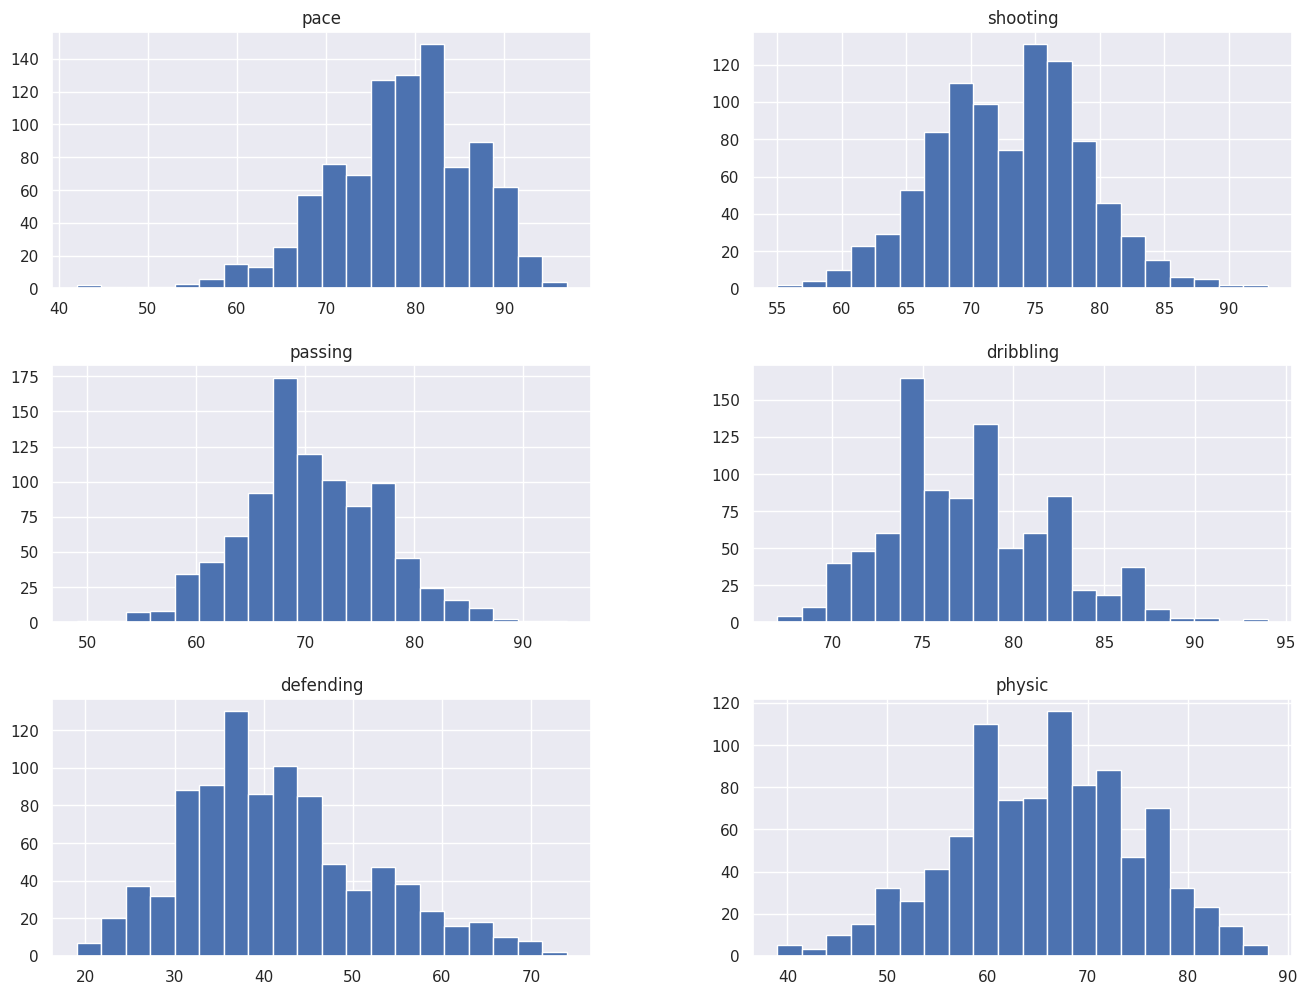

In [79]:
variaveis[["pace", "shooting", "passing", "dribbling", "defending", "physic"]].hist(bins = 20, figsize=(16, 12))
plt.show()

Observe que o histograma de ritmo (pace) está assimétrico a esquerda, o que indica que há jogadores de bom ritmo no cluster 8. Enquando o histograma de finalização (shooting) apresentou uma distribuição normal, o que indica que pode-se ter bons atacantes no nosso cluster. Os gráficos de passe (passing) e drible (dribbling) já apresentaram alguns *outliers*. Porém, estão distribuídos em uma boa escala, o que indica que há bons meias em nosso cluster.
Observe que não há bons defensores no nosso cluster, haja vista que o histograma apresentou uma distribuição assimétrica a direita.

Vamos plotar o boxplot para uma melhor visualização de nossos *outliers*.

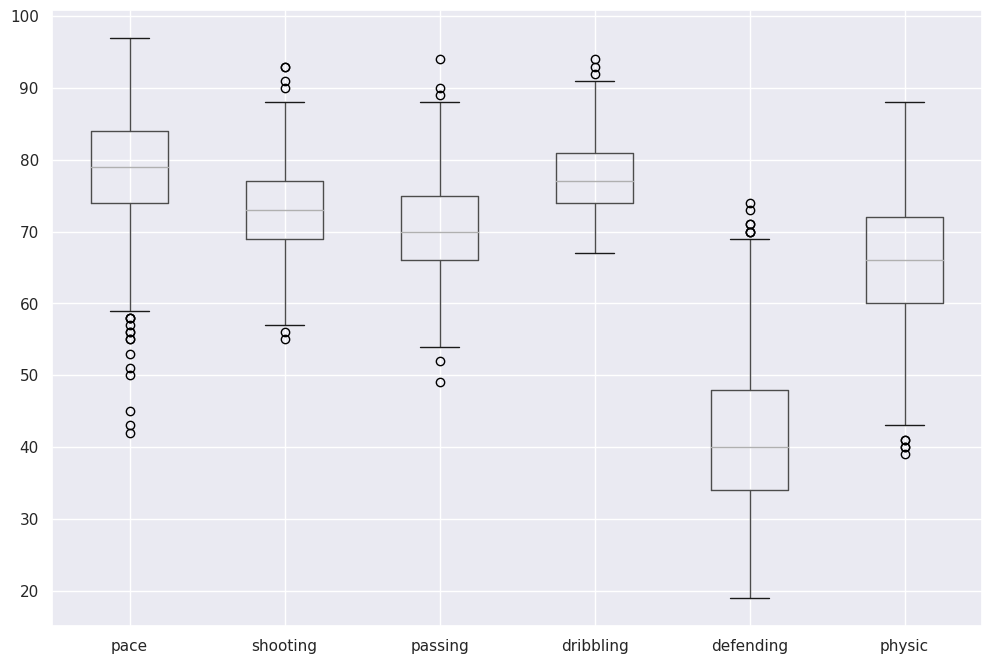

In [80]:
variaveis[["pace", "shooting", "passing", "dribbling", "defending", "physic"]].boxplot(grid=True, figsize=(12,8))
plt.show()

Pode-se observar que as variáveis ritmo, finalização, passe e drible estão em um intervalo expressivo, em detrimento das variáveis de defesa e psicológico, ou seja, nosso cluster tem principalmente meias, atacantes e alguns jogadores com boas características ofensivas, como laterais.

Para confirmar essa informação, vamos plotar um gráfico de barras de acordo com a posição dos jogadores.

<Axes: xlabel='player_positions'>

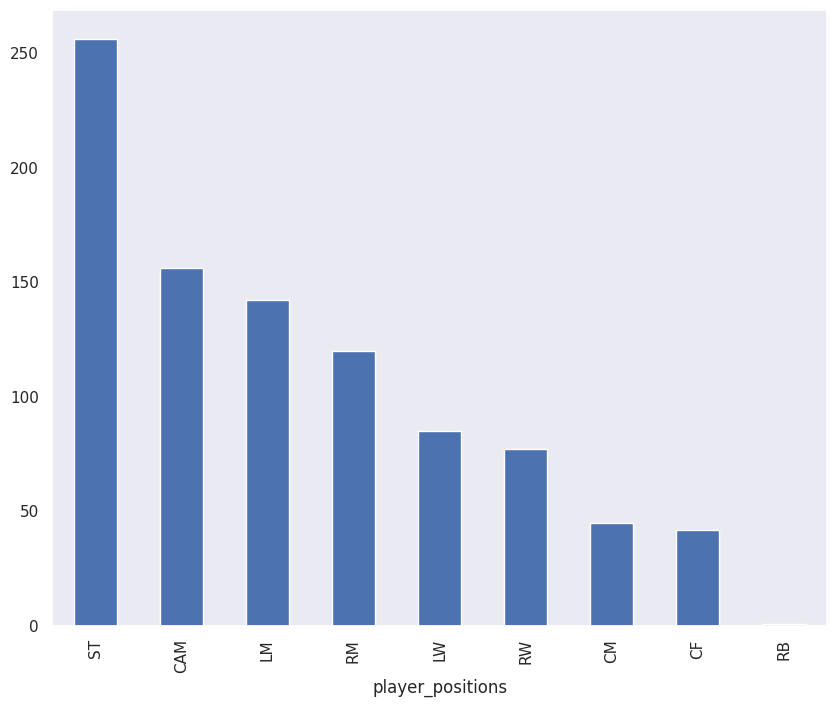

In [81]:
cluster8['player_positions'].apply(lambda x: x.split(',')[0]).value_counts().plot.bar(grid=False, figsize = (10,8))

Como primeira análise, vamos verificar como é possível encontrar jogadores baratos e com potencial neste cluster. Para isso, plotaremos um gráfico de dispersão comparando o preço e valor em euros e em seguida, idade x potencial, idade x valor em euros dos jogadores do cluster!

Como em todos os clusters podem ter jogadores com alto potencial, vou plotar os graficos considerando todo nosso dataset

In [86]:
import plotly.express as px
import plotly.graph_objects as go

# Plotando Scatter Plot do Idade x Potencial
fig = px.scatter(df_novo, x = "value_eur", y = "potential", size="age",
                 color = 'value_eur', hover_name = "short_name", size_max = 80, width = 1000,
                 color_continuous_scale=["#00bfff", "#1e90ff", "#4169e1", "#6495ed", "#87ceeb",
                                         "#00ced1", "#20b2aa", "#5f9ea0", "#4682b4"])

fig.update_layout(title=go.layout.Title(text="<b>Idade x Potencial</b>", x=0.080, y=0.99, font=dict(
                family="sans-serif",
                size=20,
                color="white"
            )))

fig.add_annotation(text="Relação entre o potencial e a idade dos jogadores do cluster 8. <b>Tamanho</b>: Valor em Euros",
                   xref="paper", yref="paper", x=-0.001, y=1.06, showarrow=False, font=dict(color="white"))

fig.update_layout({
    "plot_bgcolor": "rgba(0, 0, 0, 0)",
    "paper_bgcolor": "rgba(0, 0, 0, 0)",
})

fig.layout.coloraxis.colorbar.title = 'Valor em Euros'
fig.layout.coloraxis.colorbar.titlefont.color = 'white'
fig.layout.coloraxis.colorbar.tickfont.color = 'white'

fig.update_xaxes(title='Valor', showgrid=False, showline=True, linewidth=2, linecolor='white', titlefont=dict(color='white'), tickfont=dict(color='white'))
fig.update_yaxes(title='Potencial', showgrid=False, showline=True, linewidth=2, linecolor='white', titlefont=dict(color='white'), tickfont=dict(color='white'))

fig.show()


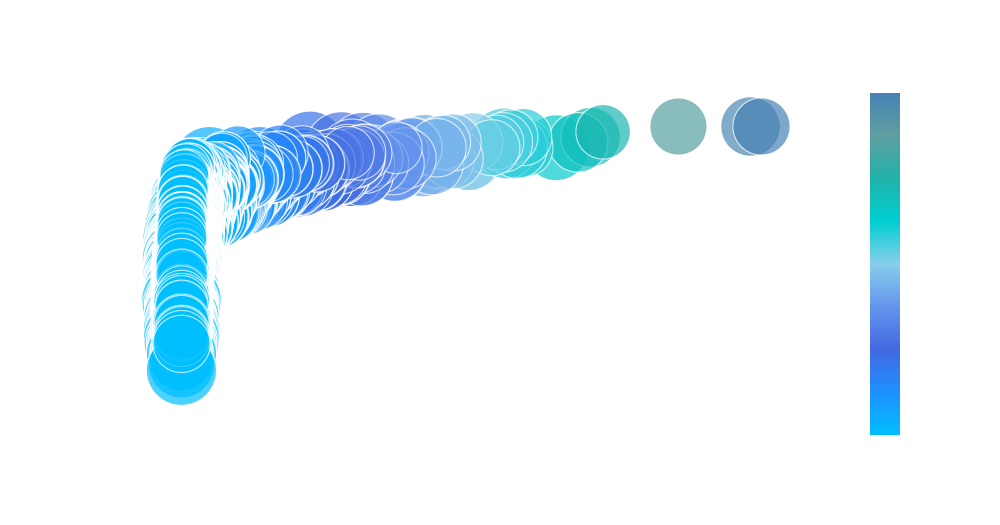

Observe o gráfico anterior tem bastante jogadores com preço menor do que 10 milhões e bastante potencial (entre 80 e 90)!

Esse cruzamento feito acima é muito importante quando estamos procurando jogadores, pois nos permite encontrar, por exemplo, jogadores novos, com um alto potencial e melhor ainda, com preço consideravelmente baixo.

In [84]:
# Plotando Scatter Plot: Valor em Euros x Idade

fig = px.scatter(df_novo, x = "value_eur", y = "age",
                 color = 'potential', hover_name = "short_name", size_max = 80, width = 1000,
                 color_continuous_scale=["#00bfff", "#1e90ff", "#4169e1", "#6495ed", "#87ceeb",
                                         "#00ced1", "#20b2aa", "#5f9ea0", "#4682b4"])


fig.update_layout(title=go.layout.Title(text="<b>Valor em Euro x Idade</b>", x=0.080, y=0.99, font=dict(
                family="sans-serif",
                size=20,
                color="#787878"
            )))

fig.add_annotation(text="Relação entre o valor em euros e a idade dos jogadores do cluster 11.",
                   xref="paper", yref="paper", x=-0.001, y=1.06, showarrow=False, font=dict(color="white"))

fig.update_layout({
"plot_bgcolor": "rgba(0, 0, 0, 0)",
"paper_bgcolor": "rgba(0, 0, 0, 0)",
})

fig.layout.coloraxis.colorbar.title = 'Potencial'
fig.layout.coloraxis.colorbar.titlefont.color = 'white'
fig.layout.coloraxis.colorbar.tickfont.color = 'white'


fig.update_xaxes(title = 'Valor em Euro', showgrid=False, showline=True, linewidth=2, linecolor='white', titlefont=dict(color='white'), tickfont=dict(color='white'))
fig.update_yaxes(title = 'Idade', showgrid=False, showline=True, linewidth=2, linecolor='white', titlefont=dict(color='white'), tickfont=dict(color='white'))
fig.show()

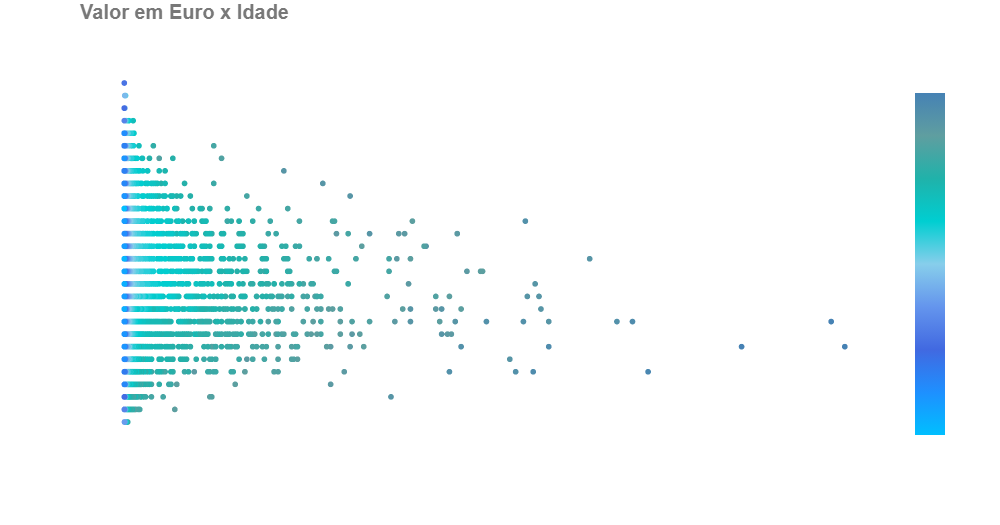

## Sugerindo Jogadores

Agora, iremos procurar jogadores com um baixo preco e um alto potencial, de acordo com os graficos e os clusters que fizemos.

# Antonio Nusa
<p align="center"><img src="https://assets.goal.com/images/v3/blte51e486729397533/GOAL_-_Blank_WEB_-_Facebook_(31).png?auto=webp&format=pjpg&width=3840&quality=60" height="300px"></p>

Nascido na Noruega o ponta se destacou na nossa analise por ter apenas 18 anos e um potencia de 86 de overall, alem de ser um ponta muito habilidoso. O modelo o colocou no mesmo Cluster de jogadores como Messi, Mbappe, Neymar, etc. Seu valor dentro do jogo e de 5,5M de euros, inicialmente com 72 de overall



# Julien Duranville

<p align="center"><img src="https://tmssl.akamaized.net/images/foto/galerie/julien-duranville-rsc-anderlecht-1674547143-100583.jpg?lm=1674547152" height="300px"></p>

O jogador tambem se destacou muito no nosso modelo, com apenas 18 anos Julien possui um potencial de 87 de overall, e um valor de apenas €850.000. Ficou tambem no Cluster dos jogadores "estrela" do jogo.Ele e um atacante muito rapido e habilidoso.

# Lennon Miller
<p align="center"><img src="https://ichef.bbci.co.uk/news/2048/cpsprodpb/1741/live/665d8140-2d58-11ee-b1d7-8fdc93c2782e.jpg" height="300px"></p>

Este jogador de 17 anos possui um potencial de 87 de overall tendo valor de mercado de apenas €220.000. O meia escocês tem como seus pontos fortes o passe e o pique.

# Jorrel Hato
<p align="center"><img src="https://tmssl.akamaized.net/images/foto/galerie/jorrel-hato-ajax-2023-24-1702459552-123754.jpg?lm=1702459559" height="300px"></p>

Para finalizar o projeto, escolhi um zagueiro que se destacou muito em nossas metricas. Com apenas 18 anos, Jorrel possui um potencial de 87, vindo com um overall inicial de 68. Seu valor de mercado esta na casa dos 1M Euros, o holandes tem como seus pontos fortes a impulsão, dividida e o pique